<a href="https://colab.research.google.com/github/basakozgurr/basakozgurr/blob/main/marturfompak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#data için gerekli kütüphaneler
import numpy as np
import pandas as pd
#görselleştirme için gerekli kütüphaneler
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)
#istatistiksel analizlerde ve hipotez testleri için gerekli kütüphaneler
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
#DataFrame'lerdeki sütunların görüntülenme sınırlarını ayarlamak için
pd.set_option("display.max.columns",None)


In [4]:
#kodu yükleyelim ve başlıklarını yazdıralım
df = pd.read_csv('Employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#verideki satır ve sütun sayısını bulalım
print("dataset shape: ",df.shape)


dataset shape:  (1470, 35)


In [7]:
#toplam sütun sayısı,null değerleri null olmayan değerleri,sütunun veri tipini, yaklaşık bellek kulanımını gösteren kod
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#sütun tiplerini gösterecek kod(Veri tipi, sütun üzerinde yapacağınız işlemleri planlarken önemli)  object yazan yerler string tipindedir
column_data_types=df.dtypes
print(column_data_types)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
#şimdi bu verileri kategorilere ayıralım
#Veri analizinde sayısal ve kategorik sütunları ayırmak ve sayısını belirlemek, farklı veri türlerinin nasıl işlendiğini ve modellemeye nasıl hazırlandığını anlamak için önemlidir
#Sayısal Veriler: Genellikle doğrudan analiz ve modelleme için kullanılabilir.
#Kategorik Veriler: Genellikle sayısal olmayan veriler olduğundan, modellemeye uygun hale getirilmesi için kodlanmaları gerekebilir.

numerical_count = 0
categorical_count = 0
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        numerical_count += 1
    else:
        categorical_count += 1

print("Numerical Count: ",numerical_count)
print("Categorical Count: ",categorical_count)


Numerical Count:  26
Categorical Count:  9


In [10]:
#işimizi kolaylaştırmak ve veriyi daha kolay incelemek adına sayısal verilerden random ilk 5 satırı alalım
df.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
605,38,471,12,3,1,837,1,45,2,2,...,3,80,1,13,3,2,4,3,1,2
940,39,360,23,3,1,1310,3,93,3,1,...,1,80,0,6,2,3,5,2,0,3
917,34,131,2,3,1,1281,3,86,3,2,...,4,80,0,4,3,3,3,2,0,2
561,52,621,3,4,1,776,3,31,2,4,...,1,80,0,34,3,4,34,6,1,16
1017,27,1377,11,1,1,1434,2,91,3,1,...,2,80,0,6,3,4,5,0,1,4


In [11]:
#işimizi kolaylaştırmak ve veriyi daha kolay incelemek adına kategorik verilerden random ilk 5 satırı alalım
df.select_dtypes(include='O').sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
600,No,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Y,No
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
554,No,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Single,Y,No
1075,No,Travel_Rarely,Research & Development,Medical,Male,Manager,Single,Y,No


In [12]:
#DataFrame'in içerisinde kaç tane tekrarlı (duplicate) satır olduğunu sayar ve bu sayıyı ekrana yazdıran kod
#.sum 1(true) olduğunda sayısını 1 arttırır ve tekrarlı olan satır sayısını sayan kod
print("Duplicates in Dateset:",df.duplicated().sum())

Duplicates in Dateset: 0


In [14]:
#şimdi var olan boş verileri NULL sayılarını ve neler olduğunu bulacağız.
missing_data=df.isnull().sum().to_frame()
print("missing data counter=",missing_data)

missing data counter=                           0
Age                       0
Attrition                 0
BusinessTravel            0
DailyRate                 0
Department                0
DistanceFromHome          0
Education                 0
EducationField            0
EmployeeCount             0
EmployeeNumber            0
EnvironmentSatisfaction   0
Gender                    0
HourlyRate                0
JobInvolvement            0
JobLevel                  0
JobRole                   0
JobSatisfaction           0
MaritalStatus             0
MonthlyIncome             0
MonthlyRate               0
NumCompaniesWorked        0
Over18                    0
OverTime                  0
PercentSalaryHike         0
PerformanceRating         0
RelationshipSatisfaction  0
StandardHours             0
StockOptionLevel          0
TotalWorkingYears         0
TrainingTimesLastYear     0
WorkLifeBalance           0
YearsAtCompany            0
YearsInCurrentRole        0
YearsSinceLastPromotion   

In [20]:
#şimdi kodumuzu inceleyip gereksiz şeyleri sileceğiz
#Over18 satırı herkes 18 yaşından büyük olduğu için gereksizdir
#EmployeeCount sütununda hepsi değer olarak 1 olduğu için gereksizdir
#EmployeeNumber sütunu işçilerin Id Nolarını verir ve bu işten ayrılmayla alakalı olmadığından gereksizdir
#StandardHours sütunu herkeste aynı olduğundan işten ayrılmada bir etken değildir ve gereksizdir
import pandas as pd

# Örneğin, bir CSV dosyasından DataFrame yükleyin
df = pd.read_csv('Employee.csv')

# Sütunları tekrar belirtip silme işlemi gerçekleştirin
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df = df.drop(columns=cols)


In [21]:
#DataFrame'inin kategorik (object) sütunları için istatistiksel özetini almayı sağlayacak kod
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('unique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('top').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('freq').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['top'].value_counts()
    for x_label, grp in _df_3.groupby('unique')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('unique')
_ = plt.ylabel('top')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['freq'].value_counts()
    for x_label, grp in _df_4.groupby('top')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('top')
_ = plt.ylabel('freq')

In [22]:
# Kategorik sütunları seçme
cat_cols = df.select_dtypes(include="O").columns

# Her bir kategorik sütun için benzersiz değerleri yazdırma
for column in cat_cols:
    print('Unique values of ', column, set(df[column]))
    print("-"*40)  # Görsel olarak ayırıcı

Unique values of  Attrition {'No', 'Yes'}
----------------------------------------
Unique values of  BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
----------------------------------------
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
----------------------------------------
Unique values of  EducationField {'Life Sciences', 'Other', 'Marketing', 'Human Resources', 'Technical Degree', 'Medical'}
----------------------------------------
Unique values of  Gender {'Male', 'Female'}
----------------------------------------
Unique values of  JobRole {'Research Director', 'Sales Representative', 'Healthcare Representative', 'Laboratory Technician', 'Manufacturing Director', 'Sales Executive', 'Human Resources', 'Manager', 'Research Scientist'}
----------------------------------------
Unique values of  MaritalStatus {'Married', 'Single', 'Divorced'}
----------------------------------------
Unique values of  OverTime {'No', 'Yes'}
----

Exploratory Data Analysis (EDA)

<ipython-input-23-49e91b4abc0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2') #çubuk grafik oluşturur, x=yes,no gibi değerler , y=bu değerlere karşılık gelen sayı


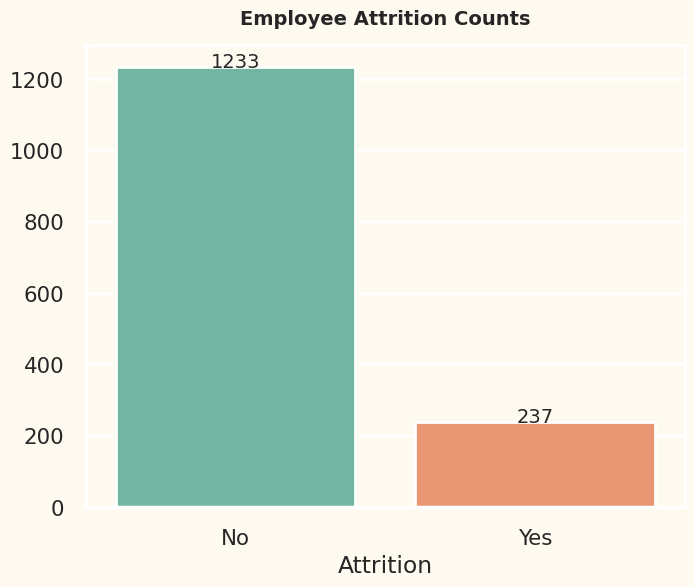

In [23]:
#Çalışan sayı kaybını görselleştirme
plt.figure(figsize=(17,6)) #17*6 olacak bir tablo oluşturur
plt.subplot(1,2,1) #bir grafik alan oluşturur ve alt parçaya odaklanır (1)e
attrition_rate = df["Attrition"].value_counts() #sütundaki farklı değerlerin sayısını hesaplar
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2') #çubuk grafik oluşturur, x=yes,no gibi değerler , y=bu değerlere karşılık gelen sayı
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15) #çubuk grafiğin başlığını belirler
for i, v in enumerate(attrition_rate.values):  #Çubuk grafik, "Yes" ve "No" olarak işten ayrılan ve ayrılmayan çalışan sayılarını gösterir ve her bir çubuğun üzerine ilgili sayı değerini ekler.
    plt.text(i, v, v,ha="center", fontsize=14)

Text(0.5, 1.0, 'Employee Attrition Rate')

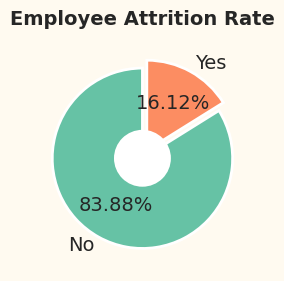

In [24]:
plt.subplot(1,2,2) #bu kod yukarıdakinin aksine ikinci parçaya odaklanır.
colors = sns.color_palette('Set2', len(attrition_rate)) #dairesel grafğin boyutunu rengini belirtir
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white') #ortaya beyaz yuvarlak ekler dairesel grafik olması için
fig = plt.gcf() #geçerli şekli alır
fig.gca().add_artist(center_circle) #geçerli şekli beyaz daireye ekler
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15) #grafiğin başlığını yazar

In [37]:
#bu kod belli bir sütunun dağılımını görselleştirmek için kullanılır
def pie_bar_plot(df, col, hue): #df işlenecek DataFrame , col=sütun , hue=grafikte renk ayrımı yapılacak sütunun adıdır
    plt.figure(figsize=(14, 6)) #belirli verilen görselleştirme için boyut

    #Belirtilen sütun için alınan değerleri sıralar ve sayılarını bulur
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1) #ilk alt parçaya odaklanır
    ax1 = value_counts #sütunlardaki değerlerdir
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1)) #renk listesi oluşturur
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, #bu satırlarda geçerl listeyi alı , ortasına byeaz daire ekler ve grafiği oluşturur
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    #şimdi aynı işlemleri 2. parçaya göre aynı şekilde tekrar yapacağız
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

    #fonksiyonumuzun içine istediğimiz parametreleri yollayıp grafikleri elde ediyoruz
    pie_bar_plot(df, 'Gender', 'Attrition')